#Section-B

##Part-a

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbrn
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv("assgn2secBData.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [5]:
cols = df.columns

In [6]:

for i in cols:
  df[i].replace('?','NaN', inplace=True)
  df[i].replace('NaN',method='ffill', inplace=True)
  # df[i].fillna()




In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [8]:
df.loc[df['num'] > 1, 'num'] = 1
df.loc[df['num'] < 1, 'num'] = 0
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


<Figure size 1000x500 with 0 Axes>

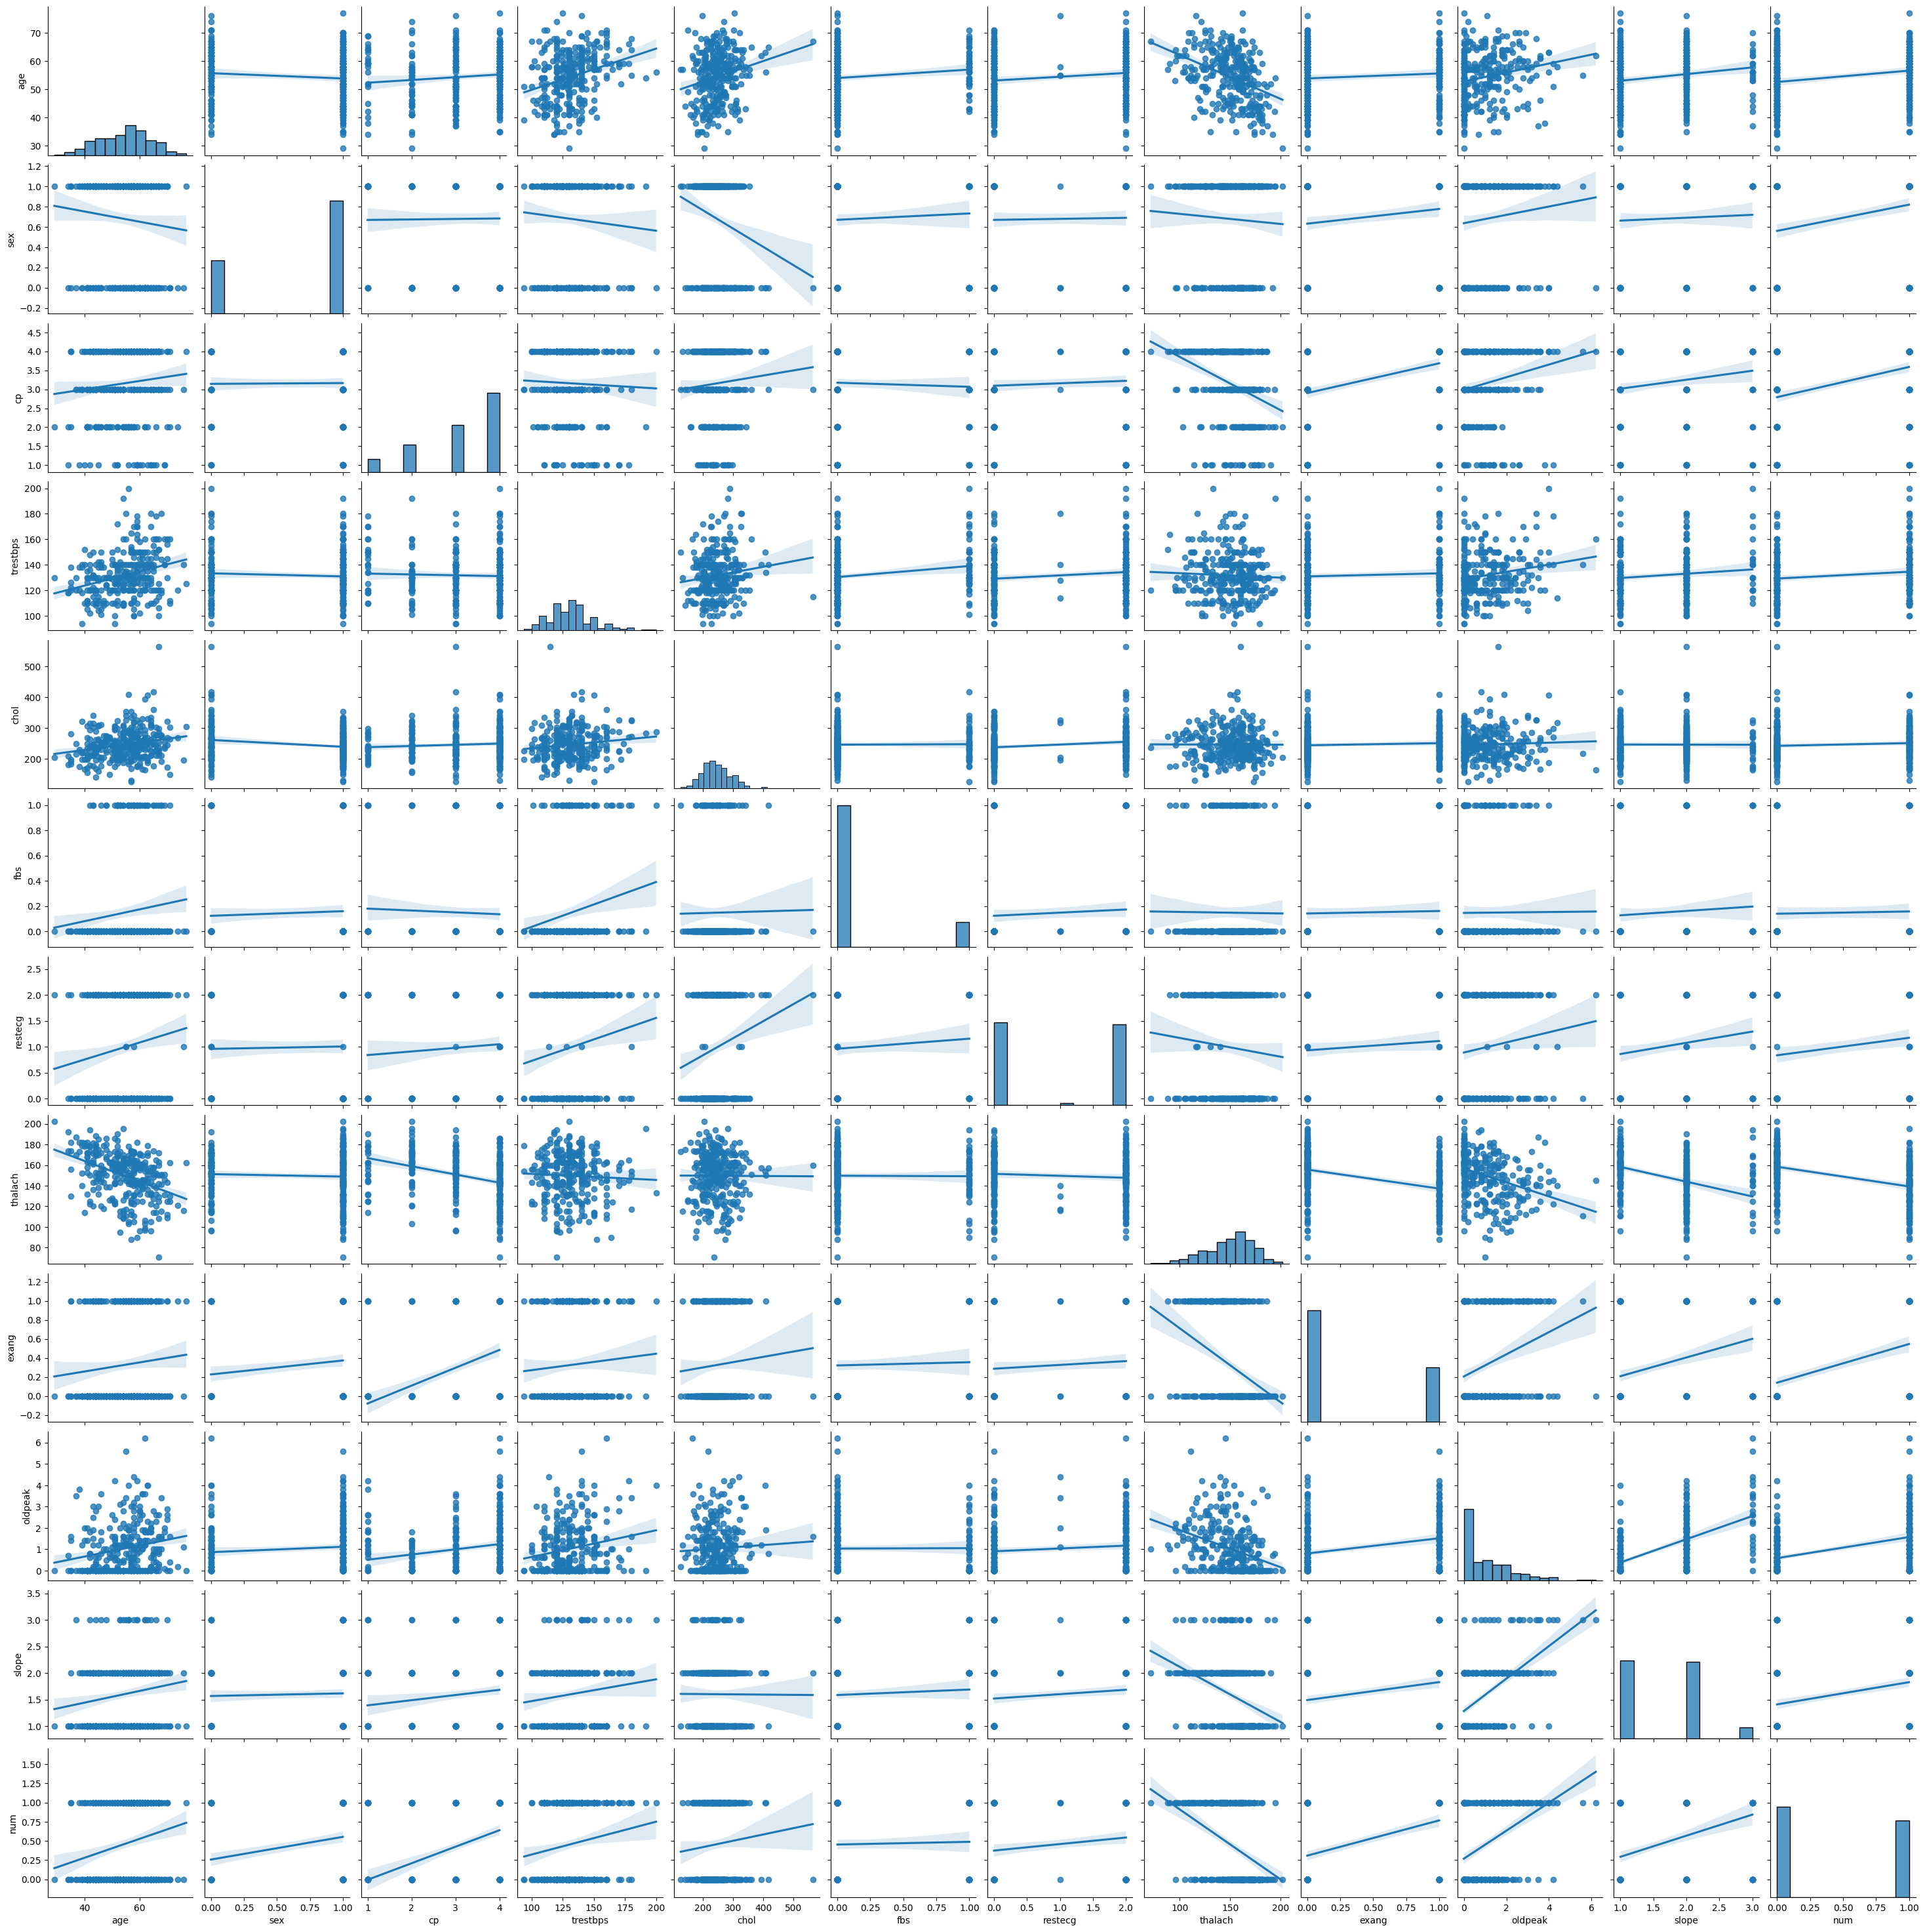

In [9]:
plt.figure(figsize=(10,5))
sbrn.pairplot(df,kind="reg")
plt.show()

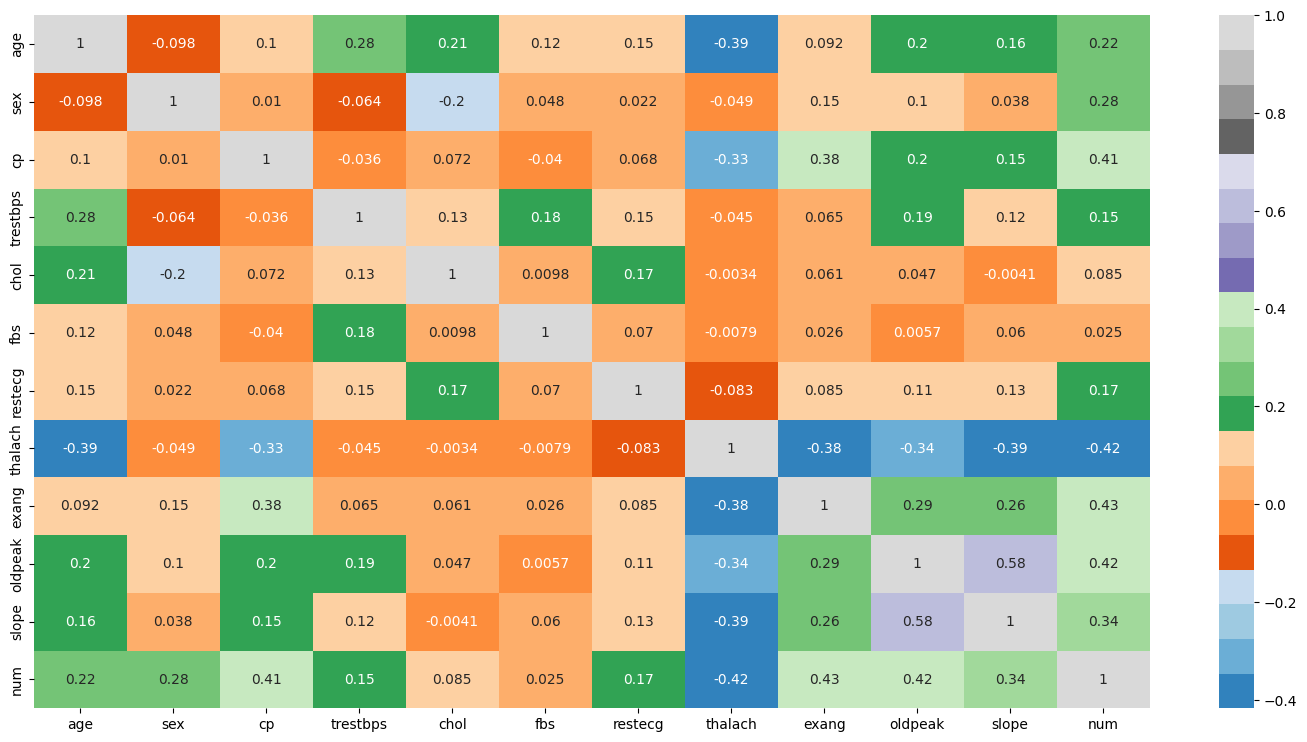

In [10]:
plt.figure(figsize=(18,9))
df_num_features = df.select_dtypes(include=np.number)
corr =  df_num_features.corr()
corr =df_num_features.corr(method='pearson')
sbrn.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

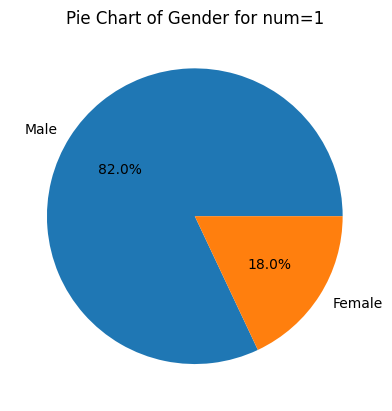

In [170]:
df_filtered = df[df['num'] == 1]
number_of_males = df_filtered['sex'].value_counts()[1]
number_of_females = df_filtered['sex'].value_counts()[0]
plt.pie([number_of_males, number_of_females], labels=['Male', 'Female'], autopct="%1.1f%%")
plt.title("Pie Chart of Gender for num=1")
plt.show()

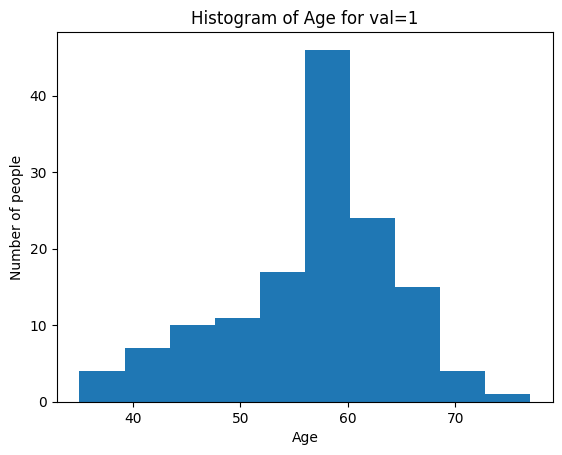

In [171]:
age_column = df_filtered['age']
plt.hist(age_column)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Histogram of Age for val=1')
plt.show()

##Part-b

In [11]:
X = df.drop(columns=['num'])
y = df['num']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #Splitting in 80:20

In [13]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

In [14]:
y_train.shape,y_test.shape

((242,), (61,))

##Part-c

###Entropy Classification

In [15]:
clfEntropy = DecisionTreeClassifier(criterion='entropy')
clfEntropy.fit(X_train,y_train)
y_predTrain = clfEntropy.predict(X_train)
y_predTest = clfEntropy.predict(X_test)

accuracyTrain = accuracy_score(y_train, y_predTrain)

print('Accuracy:', accuracyTrain)

accuracyTest = accuracy_score(y_test, y_predTest)

print('Accuracy:', accuracyTest)


Accuracy: 1.0
Accuracy: 0.8032786885245902


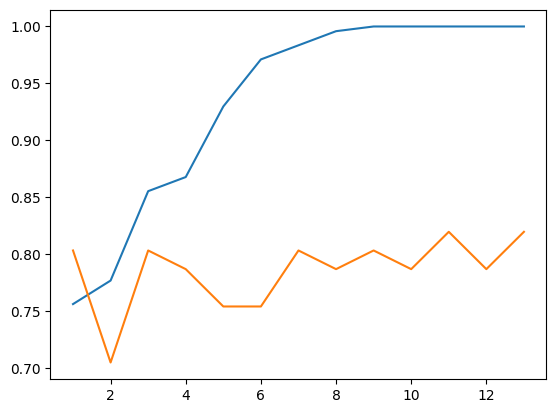

In [16]:
AccuTrainEnt = []
AccuTestEnt  = []
for i in range(1,14):
  clfEntropy = DecisionTreeClassifier(criterion='entropy',max_depth=i)
  clfEntropy.fit(X_train,y_train)
  y_predTrain = clfEntropy.predict(X_train)
  y_predTest = clfEntropy.predict(X_test)

  accuracyTrain = accuracy_score(y_train, y_predTrain)

  # print('Accuracy:', accuracyTrain)

  accuracyTest = accuracy_score(y_test, y_predTest)

  # print('Accuracy:', accuracyTest)
  AccuTrainEnt.append(accuracyTrain)
  AccuTestEnt.append(accuracyTest)

valx = np.arange(1,14)
plt.plot(valx,AccuTrainEnt,valx,AccuTestEnt)
plt.show()


In [17]:
print("Best Fit for index",np.argmax(AccuTestEnt)+1," accuracy  ",max(AccuTestEnt))

Best Fit for index 11  accuracy   0.819672131147541


###Gini Impurity

In [18]:
clfEntropy = DecisionTreeClassifier(criterion='gini')
clfEntropy.fit(X_train,y_train)
y_predTrain = clfEntropy.predict(X_train)
y_predTest = clfEntropy.predict(X_test)

accuracyTrain = accuracy_score(y_train, y_predTrain)

print('Accuracy:', accuracyTrain)

accuracyTest = accuracy_score(y_test, y_predTest)

print('Accuracy:', accuracyTest)

Accuracy: 1.0
Accuracy: 0.7213114754098361


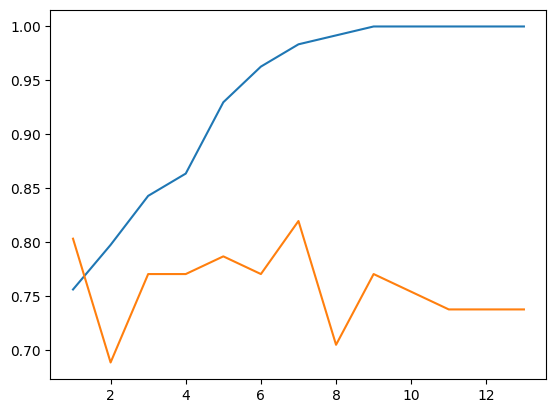

In [19]:
AccuTrainG = []
AccuTestG  = []
for i in range(1,14):
  clfEntropy = DecisionTreeClassifier(criterion='gini',max_depth=i)
  clfEntropy.fit(X_train,y_train)
  y_predTrain = clfEntropy.predict(X_train)
  y_predTest = clfEntropy.predict(X_test)

  accuracyTrain = accuracy_score(y_train, y_predTrain)

  # print('Accuracy:', accuracyTrain)

  accuracyTest = accuracy_score(y_test, y_predTest)

  # print('Accuracy:', accuracyTest)
  AccuTrainG.append(accuracyTrain)
  AccuTestG.append(accuracyTest)

valx = np.arange(1,14)
plt.plot(valx,AccuTrainG,valx,AccuTestG)
plt.show()


In [20]:
print("Best Fit for index",np.argmax(AccuTestG)+1," accuracy  ",max(AccuTestG))

Best Fit for index 7  accuracy   0.819672131147541


In [21]:
if(max(AccuTestG)>max(AccuTestEnt)):
  BESTFIT='gini'
  BESTDEPTH = np.argmax(AccuTestG)+1
  BESTACCU = max(AccuTestG)
else:
  BESTFIT='entropy'
  BESTDEPTH = np.argmax(AccuTestEnt)+1
  BESTACCU = max(AccuTestEnt)

print("Best Fit Model is found to be",BESTFIT,"with accuracy",BESTACCU,"and has a depth of",BESTDEPTH)


Best Fit Model is found to be entropy with accuracy 0.819672131147541 and has a depth of 11


##Part-d

In [22]:
#HyperParameter Intialising
Param_Grid = {'min_samples_split': [2, 5,8, 10,12,15,20],
               'max_features': ['auto', 'sqrt', 'log2']}



In [23]:
# kf3 = KFold(n_splits=3, shuffle=True)
# kf4 = KFold(n_splits=4, shuffle=True)
# kf5 = KFold(n_splits=5, shuffle=True)
# kf10= KFold(n_splits=10, shuffle=True)

# folds = []

# for train_index, test_index in kf3.split(X_train):
#     folds.append((train_index, test_index))

# for train_index, test_index in kf4.split(X_train):
#     folds.append((train_index, test_index))

# for train_index, test_index in kf5.split(X_train):
#     folds.append((train_index, test_index))

# for train_index, test_index in kf10.split(X_train):
#     folds.append((train_index, test_index))

# Instantiate the GridSearchCV object
# GridSearchclf = GridSearchCV(estimator=DecisionTreeClassifier(criterion=BESTFIT),
#                              param_grid=Param_Grid,
#                              cv=10,
#                              n_jobs=-1)



In [24]:
# GridSearchclf.fit(X_train, y_train)

In [25]:
# GridSearchclf.best_params_

In [26]:
# y_pred = GridSearchclf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)

Checking for CV-fold 3
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 10} for cv3
Accuracy: 0.819672131147541
Checking for CV-fold 4
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 20} for cv4
Accuracy: 0.7377049180327869
Checking for CV-fold 5
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 12} for cv5
Accuracy: 0.7868852459016393
Checking for CV-fold 8
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 15} for cv8
Accuracy: 0.7377049180327869
Checking for CV-fold 10
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 20} for cv10
Accuracy: 0.7704918032786885


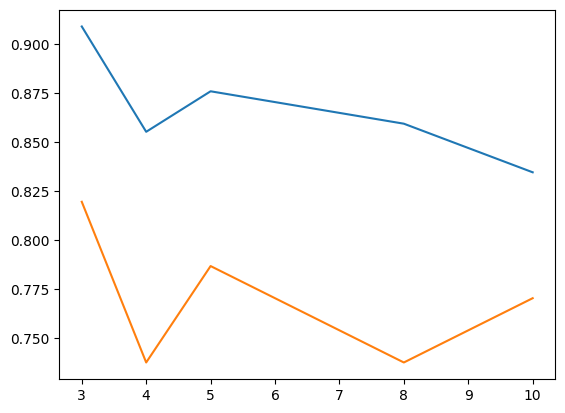

In [27]:
folds = [3,4,5,8,10]
foldTest = []
AccuTest=[]
AccuTrain=[]
for i in folds:
  print("Checking for CV-fold",i)
  GridSearchclf = GridSearchCV(estimator=DecisionTreeClassifier(criterion=BESTFIT),
                             param_grid=Param_Grid,
                             cv=i,
                             n_jobs=-1)
  GridSearchclf.fit(X_train, y_train)
  print(f"Best Parameters obtained are : {GridSearchclf.best_params_} for cv{i}")
  y_pred = GridSearchclf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  AccuTrain.append(accuracy)
  y_pred = GridSearchclf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  AccuTest.append(accuracy)
  print('Accuracy:', accuracy)
plt.plot(folds,AccuTrain,folds,AccuTest)
plt.show()

Checking for CV-fold 3
Best Parameters obtained are : {'max_features': 8, 'min_samples_split': 12} for cv3
Accuracy: 0.7049180327868853
Checking for CV-fold 4
Best Parameters obtained are : {'max_features': 10, 'min_samples_split': 20} for cv4
Accuracy: 0.8032786885245902
Checking for CV-fold 5
Best Parameters obtained are : {'max_features': 6, 'min_samples_split': 20} for cv5
Accuracy: 0.7377049180327869
Checking for CV-fold 8
Best Parameters obtained are : {'max_features': 12, 'min_samples_split': 5} for cv8
Accuracy: 0.7377049180327869
Checking for CV-fold 10
Best Parameters obtained are : {'max_features': 5, 'min_samples_split': 12} for cv10
Accuracy: 0.6721311475409836


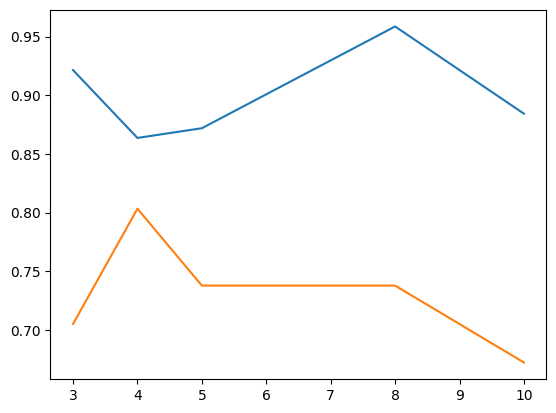

In [28]:
Param_Grid = {'min_samples_split': [2, 5,8, 10,12,15,20],
               'max_features': np.arange(1,14)}
folds = [3,4,5,8,10]
AccuTest=[]
AccuTrain=[]
foldTest = []
for i in folds:
  print("Checking for CV-fold",i)
  GridSearchclf = GridSearchCV(estimator=DecisionTreeClassifier(criterion=BESTFIT),
                             param_grid=Param_Grid,
                             cv=i,
                             n_jobs=-1)
  GridSearchclf.fit(X_train, y_train)
  print(f"Best Parameters obtained are : {GridSearchclf.best_params_} for cv{i}")
  y_pred = GridSearchclf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  AccuTrain.append(accuracy)
  y_pred = GridSearchclf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  AccuTest.append(accuracy)
  print('Accuracy:', accuracy)
plt.plot(folds,AccuTrain,folds,AccuTest)
plt.show()

##Part-e

In [29]:
#HyperParameter Intialising
Param_Grid = {'min_samples_split': [2, 5,8, 10,12,15,20],
               'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [50,100,150, 200,300,400, 500]}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 50} for cv3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 50} for cv4
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 50} for cv5


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 50} for cv8
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 15, 'n_estimators': 50} for cv10
Accuracy: 0.8360655737704918


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 100} for cv3
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 12, 'n_estimators': 100} for cv4
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100} for cv5
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 100} for cv8
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 100} for cv10
Accuracy: 0.819672131147541
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 150} for cv3
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 150} for cv4


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 150} for cv5
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 150} for cv8


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 150} for cv10
Accuracy: 0.8360655737704918
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 200} for cv3
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200} for cv4
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 20, 'n_estimators': 200} for cv5
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200} for cv8
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 200} for cv10
Accuracy: 0.819672131147541
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 300} for cv3
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 20, 'n_estimators': 300} for cv4
Best Parameters obtained are : {'max_features': 'sqrt', 'min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 300} for cv10
Accuracy: 0.8360655737704918


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 400} for cv3
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 400} for cv4
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 400} for cv5
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 15, 'n_estimators': 400} for cv8


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 400} for cv10
Accuracy: 0.8524590163934426
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 500} for cv3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 500} for cv4
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 500} for cv5
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 500} for cv8
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 500} for cv10
Accuracy: 0.8360655737704918


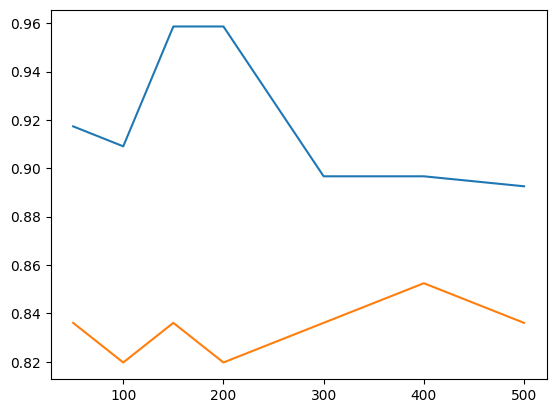

In [30]:
TestAccu=[]
TrainAccu=[]
estimators=[50,100,150, 200,300,400, 500]
for est in estimators:
  Param_Grid = {'min_samples_split': [2, 5,8, 10,12,15,20],
               'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [est]}
  AccuTest=[]
  AccuTrain=[]
  folds = [3,4,5,8,10]
  foldTest = []
  for i in folds:
    # print("Checking for CV-fold",i)
    GridSearchclf = GridSearchCV(estimator=RandomForestClassifier(criterion="entropy"),
                              param_grid=Param_Grid,
                              cv=i,
                              n_jobs=-1)
    GridSearchclf.fit(X_train, y_train)
    print(f"Best Parameters obtained are : {GridSearchclf.best_params_} for cv{i}")
    y_pred = GridSearchclf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  AccuTrain.append(accuracy)
  y_pred = GridSearchclf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  AccuTest.append(accuracy)
  print('Accuracy:', accuracy)
  TrainAccu.append(AccuTrain[np.argmax(AccuTest)])
  TestAccu.append(AccuTest[np.argmax(AccuTest)])
plt.plot(estimators,TrainAccu,estimators,TestAccu)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 50} for cv3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 50} for cv4


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 50} for cv5
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 15, 'n_estimators': 50} for cv8
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50} for cv10
Accuracy: 0.819672131147541
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100} for cv3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100} for cv4
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 12, 'n_estimators': 100} for cv5


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 100} for cv8
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 12, 'n_estimators': 100} for cv10
Accuracy: 0.8524590163934426
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 150} for cv3
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 12, 'n_estimators': 150} for cv4
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 150} for cv5
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 150} for cv8
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 12, 'n_estimators': 150} for cv10
Accuracy: 0.819672131147541
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 200} for cv3
Best Parameters obtained are : {'max_features': 'log2', 'min_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 200} for cv10
Accuracy: 0.8360655737704918
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 300} for cv3
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 300} for cv4
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300} for cv5


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 300} for cv8
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 300} for cv10
Accuracy: 0.8360655737704918
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 12, 'n_estimators': 400} for cv3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 400} for cv4


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 400} for cv5


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 400} for cv8


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 400} for cv10
Accuracy: 0.8360655737704918
Best Parameters obtained are : {'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 500} for cv3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 500} for cv4
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 500} for cv5
Best Parameters obtained are : {'max_features': 'log2', 'min_samples_split': 12, 'n_estimators': 500} for cv8


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters obtained are : {'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 500} for cv10
Accuracy: 0.8360655737704918


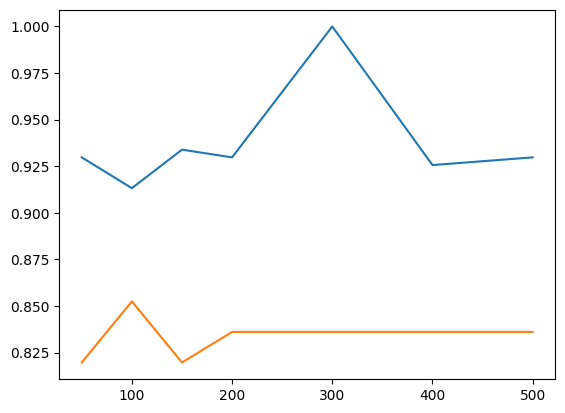

In [31]:
TestAccu=[]
TrainAccu=[]
estimators=[50,100,150, 200,300,400, 500]
for est in estimators:
  Param_Grid = {'min_samples_split': [2, 5,8, 10,12,15,20],
               'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [est]}
  AccuTest=[]
  AccuTrain=[]
  folds = [3,4,5,8,10]
  foldTest = []
  for i in folds:
    # print("Checking for CV-fold",i)
    GridSearchclf = GridSearchCV(estimator=RandomForestClassifier(criterion="gini"),
                              param_grid=Param_Grid,
                              cv=i,
                              n_jobs=-1)
    GridSearchclf.fit(X_train, y_train)
    print(f"Best Parameters obtained are : {GridSearchclf.best_params_} for cv{i}")
    y_pred = GridSearchclf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  AccuTrain.append(accuracy)
  y_pred = GridSearchclf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  AccuTest.append(accuracy)
  print('Accuracy:', accuracy)
  TrainAccu.append(AccuTrain[np.argmax(AccuTest)])
  TestAccu.append(AccuTest[np.argmax(AccuTest)])
plt.plot(estimators,TrainAccu,estimators,TestAccu)
plt.show()

In [32]:
#HyperParameter Intialising
Param_Grid = {'min_samples_split': [2, 5,8, 10,12,15,20],
               'max_features': np.arange(1,14),
              'n_estimators': [50,100,150, 200,300,400, 500]}
folds = [3,4,5,8,10]
foldTest = []
for i in folds:
  print("Checking for CV-fold",i)
  GridSearchclf = GridSearchCV(estimator=RandomForestClassifier(criterion="entropy"),
                             param_grid=Param_Grid,
                             cv=i,
                             n_jobs=-1)
  GridSearchclf.fit(X_train, y_train)
  print(f"Best Parameters obtained are : {GridSearchclf.best_params_} for cv{i}")
  y_pred = GridSearchclf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy:', accuracy)


Checking for CV-fold 3
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 2, 'n_estimators': 50} for cv3
Accuracy: 0.8032786885245902
Checking for CV-fold 4
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 5, 'n_estimators': 300} for cv4
Accuracy: 0.8360655737704918
Checking for CV-fold 5
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 12, 'n_estimators': 50} for cv5
Accuracy: 0.8360655737704918
Checking for CV-fold 8
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 5, 'n_estimators': 50} for cv8
Accuracy: 0.8032786885245902
Checking for CV-fold 10
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 2, 'n_estimators': 100} for cv10
Accuracy: 0.8360655737704918


In [33]:
#HyperParameter Intialising
Param_Grid = {'min_samples_split': [2, 5,8, 10,12,15,20],
               'max_features': np.arange(1,14),
              'n_estimators': [50,100,150, 200,300,400, 500]}
folds = [3,4,5,8,10]
foldTest = []
for i in folds:
  print("Checking for CV-fold",i)
  GridSearchclf = GridSearchCV(estimator=RandomForestClassifier(criterion="gini"),
                             param_grid=Param_Grid,
                             cv=i,
                             n_jobs=-1)
  GridSearchclf.fit(X_train, y_train)
  print(f"Best Parameters obtained are : {GridSearchclf.best_params_} for cv{i}")
  y_pred = GridSearchclf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy:', accuracy)

Checking for CV-fold 3
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 12, 'n_estimators': 150} for cv3
Accuracy: 0.819672131147541
Checking for CV-fold 4
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 5, 'n_estimators': 100} for cv4
Accuracy: 0.819672131147541
Checking for CV-fold 5
Best Parameters obtained are : {'max_features': 5, 'min_samples_split': 12, 'n_estimators': 150} for cv5
Accuracy: 0.8360655737704918
Checking for CV-fold 8
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 15, 'n_estimators': 150} for cv8
Accuracy: 0.8360655737704918
Checking for CV-fold 10
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 20, 'n_estimators': 100} for cv10
Accuracy: 0.819672131147541


In [167]:
#HyperParameter Intialising
Param_Grid = {'min_samples_split': [2, 5, 10,15,20],
               'max_features': np.arange(1,14),
              'n_estimators': [10,20,50,100, 200,400, 500]}

print("Checking for CV-fold",6)
GridSearchclf = GridSearchCV(estimator=RandomForestClassifier(criterion="gini"),
                            param_grid=Param_Grid,
                            cv=6,
                            n_jobs=-1)
GridSearchclf.fit(X_train, y_train)
print(f"Best Parameters obtained are : {GridSearchclf.best_params_} for cv{i}")
y_pred = GridSearchclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

Checking for CV-fold 6
Best Parameters obtained are : {'max_features': 1, 'min_samples_split': 20, 'n_estimators': 200} for cv5
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

     class 0       0.80      0.94      0.86        34
     class 1       0.90      0.70      0.79        27

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61



#Section-C

##Part-a Self Implementation

In [99]:
L=[1,2]

np.array(L)**2

array([1, 4])

In [110]:
class Node():
    def __init__(self, info_gain=None, feature_index=None, threshold=None, left=None, right=None, value=None,dep=None):

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.depth = dep
        # for leaf node
        self.leaf = value

In [35]:
l=['hi', 'hi' , 'hi' ,'hi',1,2,3]
l[:-2],l[-2:]
Y = list(l)
max(Y, key=Y.count)
# Y.count

'hi'

In [162]:
class MyDecisionTree:

  #constructor for intialization
  def __init__(self,cost=None,maxDepth=None):
    self.Depth = maxDepth
    self.root = None
    self.cost = cost
    self.deep = 0
    self.istrained = False

  def cost_function(self,node,left,right):
    #Checks the cost of choice and begins the evalution
    if(self.cost == "gini"):
      return self.giniIndex(node,left,right)
    else:
      return self.informationGain(node,left,right)

  def giniIndex(self,node,left,right):
    #Required Gini Values
    giniNode = self.gini(node)
    giniRight = self.gini(right)
    giniLeft = self.gini(left)
    ProbLeft = len(left)/len(node)
    ProbRight = len(right)/len(node)
    #Gini Gain/Index Calculation
    giniGain = giniNode - (ProbRight * giniRight) - (ProbLeft*giniLeft)
    return giniGain
  def gini(self,node):
    #Calculation of Gini Values
    labels = np.unique(node)
    ent =0
    for l in labels:
      # print(l,labels)
      pL = len(node[node==l])/len(node)
      ent+=pL**2
    return (1-ent)  # as gini = 1-sigma(pL**2)

  def informationGain(self,node,left,right):
    #Required values for infoGain
    infoGain = self.entropy(node)
    ProbLeft = len(left)/len(node)
    ProbRight = len(right)/len(node)

    infoGain-=self.entropy(left) * ProbLeft
    infoGain-=self.entropy(right) * ProbRight
    #returning the gain by IG=Ent(node)-Ent(left)-Ent(right)
    return infoGain

  def entropy(self,node):
    #Calculates the Entropy of the Node as given by Ent(Node) = -1*sigma(pL*log2(pL))
    labels = np.unique(node)
    ent = []
    for l in labels:
      # print(l,labels)
      pL = len(node[node==l])/len(node)
      ent.append(-1*pL*np.log2(pL))
    # ent = np.array(ent)
    return np.sum(ent)

  def fit(self,X,Y,depth=0):
    numRows,numFeatures = X.shape
    numRowsY,numFeaturesY = Y.shape

    if(numRowsY != numRows):
      print("*"*10,"Invalid size of X and Y recieved please rectify and then try again","*"*10)
      return -1
    #Used to intialise fitting the model
    #The shape is checked to avoid issues during processing
    #Branch chosen depending if maxDepth specified or not
    #In either branch make_Split is used which returns the IG associated with the split and other data
    #If IG>0 only then split is made and recurrsive code works, else the node is made a root node
    if(self.Depth==None):#If no depth is Specified
      if(numRows>1 and len(np.unique(Y))>1):
        self.deep = max(self.deep,depth)
        #print("hi")
        IG,left,right,val,featureIdx = self.make_split(X,Y)
        #print(IG)
        if(IG>0):
          #print("valid")
          leftSide = self.fit(left[:,:-numFeaturesY],left[:,-numFeaturesY:],depth+1)
          rightSide=self.fit(right[:,:-numFeaturesY],right[:,-numFeaturesY:],depth+1)

          curr=Node(IG,featureIdx,val,leftSide,rightSide,dep=depth)
          if(depth==0): #Handling Root Node
            self.root = curr
            print("Depth",self.deep)
            self.istrained = True
          return curr
      Y1 = Y.tolist()
      return Node(value=max(Y1, key=Y1.count),dep=depth)#Leave node
    else:#If depth is specied
      if(numRows>1 and len(np.unique(Y))>1 and depth<self.Depth):
        self.deep = max(self.deep,depth)
        IG,left,right,val,featureIdx = self.make_split(X,Y)
        #print(IG)
        if(IG>0):
          #print("valid",IG)
          leftSide = self.fit(left[:,:-numFeaturesY],left[:,-numFeaturesY:],depth+1)
          rightSide=self.fit(right[:,:-numFeaturesY],right[:,-numFeaturesY:],depth+1)

          curr=Node(IG,featureIdx,val,leftSide,rightSide,dep=depth)
          if(depth==0):
            self.root = curr
            print("Depth",self.deep)
            self.istrained = True
          return curr
      self.deep = max(self.deep,depth)
      Y1 = Y.tolist()
      return Node(value=max(Y1, key=Y1.count),dep=depth)

  def make_split(self,X,Y):
    numRows,numFeatures = X.shape
    numRowsY,numFeaturesY = Y.shape
    data = np.concatenate((X, Y), axis=1)
    #Features to keep track of BestSplit
    maxIG = 0
    Bestleft =[]
    Bestright=[]
    BestVal=-1
    BestFeature=-1
    for fIdx in range(numFeatures): #Running at the Node for all the relevant features
      featureValues = X[:, fIdx]
      possibleValues= np.unique(featureValues)#Extracting unique values of a feature

      for val in possibleValues:  #iterating over the unique values and apt calculation for left and right
        dataleft = data[data[:, fIdx] < val]
        dataright = data[data[:, fIdx] >= val]

        if(dataleft.shape[0]>0 and dataright.shape[0]>0):
          y, left_y, right_y = data[:, -numFeatures:], dataleft[:, -numFeatures:], dataright[:, -numFeatures:]
          currIG = self.cost_function(y, left_y, right_y)
          if(currIG>maxIG):#Setting Best Param
              maxIG=currIG
              Bestleft=dataleft
              Bestright=dataright
              BestVal = val
              BestFeature =fIdx
    return maxIG,Bestleft,Bestright,BestVal,BestFeature #Returning Best Param

  def predict(self,X):
    #First Sees if the model is trained or not
    #Doesn't work on untrained model
    if(self.istrained):
      predictions = []
      for x in X:
        predictions.append(self.makePredict(x,self.root)) #If the model is trained then uses a recursive function makePredict to make Prediction
      return predictions
    else:
      print("Model not trained yet, Can't predict")
      return []

  def makePredict(self,X,node):
    # print(type(node))
    if node.leaf!=None: #Checks if leaf Node if yes return the value
      return node.leaf
    feature_val = X[node.feature_index]
    if feature_val<node.threshold: #If less then move left
      return self.makePredict(X, node.left)
    else:                          #Else move right
      return self.makePredict(X, node.right)

  def max_depth(self):
    #Shows the max_depth and changes it if needed
    print(f"Currently depth set is {self.Depth}")
    print("Do you want to change it?YES")
    response = input()
    if(response=='YES'):
      print("Input the max Depth")
      dep = int(input())
      self.Depth = dep
      self.istrained=False # Model has to be Retrained for the new Depth

  def score(self,XTrain, YTrain,XTest,YTest):
    if(self.istrained):
      YTrainPred = self.predict(XTrain)#Gets the Prediction
      YTestPred  = self.predict(XTest)
      YTrainPredAccu = self.AccuCalc(YTrainPred,YTrain)#GEts the score
      YTestPredAccu = self.AccuCalc(YTestPred,YTest)
      print(YTestPredAccu, YTrainPredAccu)
      return YTestPredAccu, YTrainPredAccu #returns it
    else:#Works only if the model is trained
      print("Model not trained yet")

  def AccuCalc(self,pred,gTruth):
    return np.sum(pred==gTruth)/len(gTruth)












In [76]:
df1 = pd.read_csv("assgn2secCData.csv")
Cols = df1.columns

for COl in Cols:
  print(COl,len(np.unique(df1[COl])))

age 94
sex 3
on thyroxine 2
query on thyroxine 2
on antithyroid medication 2
sick 2
pregnant 2
thyroid surgery 2
I131 treatment 2
query hypothyroid 2
query hyperthyroid 2
lithium 2
goitre 2
tumor 2
hypopituitary 2
psych 2
TSH measured 2
TSH 264
T3 measured 2
T3 65
TT4 measured 2
TT4 218
T4U measured 2
T4U 139
FTI measured 2
FTI 210
TBG measured 1
TBG 1
referral source 5
label 4


In [77]:
df1 = df1[df1['label'].isin(['hyperthyroid', 'negative'])]
df1 = df1[df1['sex'].isin(['F','M'])]
df1

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,0,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,0,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,0,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,0,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,M,f,f,f,f,f,f,f,f,...,t,155.0,t,1.05,t,148.0,f,0,SVI,negative
2796,73,M,f,t,f,f,f,f,f,f,...,t,63.0,t,0.88,t,72.0,f,0,other,negative
2797,75,M,f,f,f,f,f,f,f,f,...,t,147.0,t,0.80,t,183.0,f,0,other,negative
2798,60,F,f,f,f,f,f,f,f,f,...,t,100.0,t,0.83,t,121.0,f,0,other,negative


In [78]:
X1 = df1.drop(columns=['label']).to_numpy()
y1 = df1['label'].to_numpy()
y1 = y1.reshape(y1.shape[0],1)
y1.shape

(2677, 1)

In [79]:
df1.info()
object_cols = df1.dtypes[df1.dtypes == 'object']
# object_cols
# one_hot_encoded_data = pd.get_dummies(df1, columns =object_cols.index)
# print(one_hot_encoded_data)
for i in object_cols.index:


  df1[i] = df1[i].astype('category')
  df1[i] = df1[i].cat.codes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2677 non-null   int64  
 1   sex                        2677 non-null   object 
 2   on thyroxine               2677 non-null   object 
 3   query on thyroxine         2677 non-null   object 
 4   on antithyroid medication  2677 non-null   object 
 5   sick                       2677 non-null   object 
 6   pregnant                   2677 non-null   object 
 7   thyroid surgery            2677 non-null   object 
 8   I131 treatment             2677 non-null   object 
 9   query hypothyroid          2677 non-null   object 
 10  query hyperthyroid         2677 non-null   object 
 11  lithium                    2677 non-null   object 
 12  goitre                     2677 non-null   object 
 13  tumor                      2677 non-null   objec

In [80]:
for COl in Cols:
  print(COl,len(np.unique(df1[COl])))

age 94
sex 2
on thyroxine 2
query on thyroxine 2
on antithyroid medication 2
sick 2
pregnant 2
thyroid surgery 2
I131 treatment 2
query hypothyroid 2
query hyperthyroid 2
lithium 2
goitre 2
tumor 2
hypopituitary 2
psych 2
TSH measured 2
TSH 262
T3 measured 2
T3 65
TT4 measured 2
TT4 213
T4U measured 2
T4U 137
FTI measured 2
FTI 204
TBG measured 1
TBG 1
referral source 5
label 2


In [81]:
df1 = pd.get_dummies(df1, columns =['referral source'])
print(df1)

      age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0      41    0             0                   0                          0   
1      23    0             0                   0                          0   
2      46    1             0                   0                          0   
3      70    0             1                   0                          0   
4      70    0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
2795   70    1             0                   0                          0   
2796   73    1             0                   1                          0   
2797   75    1             0                   0                          0   
2798   60    0             0                   0                          0   
2799   81    0             0                   0                          0   

      sick  pregnant  thyroid surgery  I131 treatme

In [83]:
df2 = pd.read_csv("assgn2secCData.csv")
Cols = df1.columns

for COl in Cols:
  print(COl,len(np.unique(df1[COl])))

age 94
sex 2
on thyroxine 2
query on thyroxine 2
on antithyroid medication 2
sick 2
pregnant 2
thyroid surgery 2
I131 treatment 2
query hypothyroid 2
query hyperthyroid 2
lithium 2
goitre 2
tumor 2
hypopituitary 2
psych 2
TSH measured 2
TSH 262
T3 measured 2
T3 65
TT4 measured 2
TT4 213
T4U measured 2
T4U 137
FTI measured 2
FTI 204
TBG measured 1
TBG 1
label 2
referral source_0 2
referral source_1 2
referral source_2 2
referral source_3 2
referral source_4 2


In [84]:
X1 = df1.drop(columns=['label']).to_numpy()
y1 = df1['label'].to_numpy()
y1 = y1.reshape(y1.shape[0],1)
y1.shape

(2677, 1)

In [85]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)

In [151]:
dtE = MyDecisionTree()

In [152]:
dtE.fit(X_train1, y_train1)

Depth 11


In [147]:
pred=dtE.predict(X_test1)

In [148]:
accuracy = accuracy_score(y_test1, pred)
print('Accuracy:', accuracy)

Accuracy: 0.9832089552238806


In [149]:
Train,Test=dtE.score(X_train1,y_train1,X_test1,y_test1)

0.9832089552238806 1.0


Depth 1
0.9794776119402985 0.9775805698271836
Depth 2
0.9794776119402985 0.9775805698271836
Depth 3
0.9794776119402985 0.9775805698271836
Depth 4
0.9794776119402985 0.9775805698271836
Depth 5
0.9869402985074627 0.982718355908454
Depth 6
0.9869402985074627 0.9859878561419897
Depth 7
0.9850746268656716 0.9873890705277908


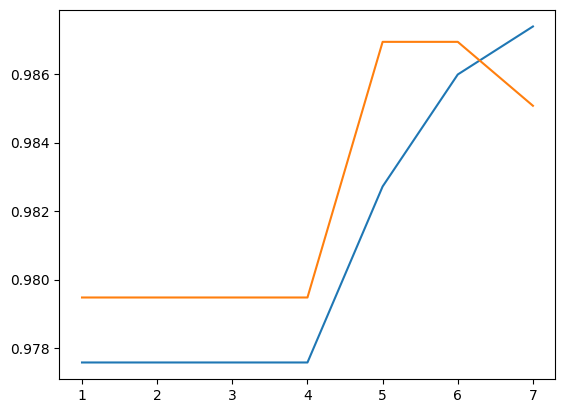

In [154]:
TrainingAccu =[]
TestingAccu = []
val = np.arange(1,8)
for i in val:
  dti = MyDecisionTree(i,i)
  dti.fit(X_train1, y_train1)
  Test,Train=dti.score(X_train1,y_train1,X_test1,y_test1)
  TrainingAccu.append(Train)
  TestingAccu.append(Test)
plt.plot(val,TrainingAccu,val,TestingAccu)
plt.show()

In [163]:
dti = MyDecisionTree("gini")
dti.fit(X_train1, y_train1)
Test,Train=dti.score(X_train1,y_train1,X_test1,y_test1)

Depth 25
0.9888059701492538 1.0
